# Data Collection

In [1]:
import kagglehub
import shutil
import os
import pandas as pd

dataset_path = kagglehub.dataset_download("atharvasoundankar/mental-health-and-digital-behavior-20202024")
print(os.listdir(dataset_path))

100%|██████████| 7.56k/7.56k [00:00<00:00, 7.05MB/s]

Extracting files...
['mental_health_digital_behavior_data.csv']


Download dataset dari kaggle, dengan judul "Mental Health and Digital Behaviour (2020-2024)"

In [2]:
file_name = "mental_health_digital_behavior_data.csv"
source_path = os.path.join(dataset_path, file_name)
target_path = os.path.join("/content", file_name)
shutil.copy(source_path, target_path)

print( target_path)

df = pd.read_csv(target_path)

/content/mental_health_digital_behavior_data.csv


Menyalin dataset lalu membacanya ke dalam df.

# Import Library

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Mengimpor library yang dibutuhkan

# EDA

In [4]:
df.shape

(500, 9)

Terdapat 500 entri data dengan 9 fitur

In [5]:
df.head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


Menampilkan beberapa contoh data. Fitur yang ada dalam dataset adalah daily_screen_time_min, num_app_switches, sleep_hours, notification_count, social_media_time_min, focus_score, mood_score, anxiety_lavel, dan digital_wellbeing_score.

In [6]:
df.describe()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,360.437800,49.840000,6.557400,79.51200,121.771800,6.998000,8.988600,8.451800,52.310400
std,58.782476,7.340993,1.192043,23.97974,43.809443,0.618742,0.519104,2.134425,7.943186
min,180.000000,30.000000,3.000000,20.00000,30.000000,5.500000,7.400000,1.000000,34.600000
25%,317.975000,44.000000,5.800000,63.00000,91.875000,6.600000,8.600000,7.275000,46.800000
50%,360.800000,50.000000,6.500000,80.00000,119.550000,7.000000,9.000000,9.700000,51.000000
75%,398.175000,55.000000,7.325000,96.00000,149.500000,7.400000,9.300000,10.000000,56.600000
max,591.200000,72.000000,10.000000,158.00000,296.700000,8.600000,10.000000,10.000000,80.800000


Menampilkan statistik deskriptif dari dataset untuk setiap fitur

In [7]:
df.isnull().sum()

,0
daily_screen_time_min,0
num_app_switches,0
sleep_hours,0
notification_count,0
social_media_time_min,0
focus_score,0
mood_score,0
anxiety_level,0
digital_wellbeing_score,0


Terlihat bahwa tidak ada missing values dalam dataset

In [8]:
df.duplicated().sum()

np.int64(0)

Terlihat bahwa tidak ada data duplikat dalam dataset

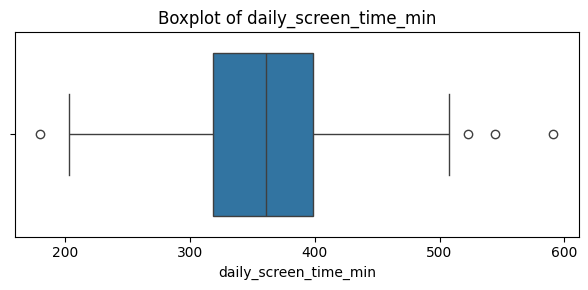

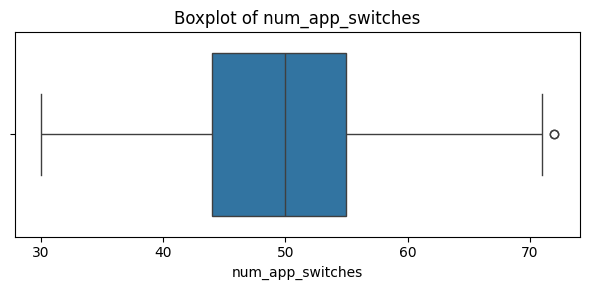

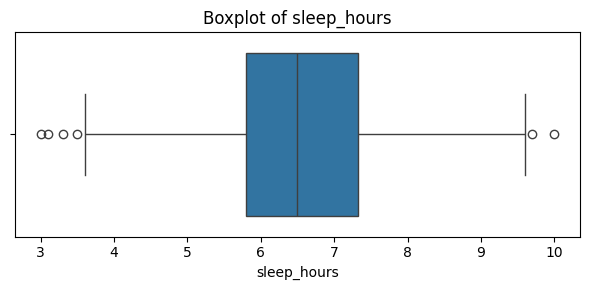

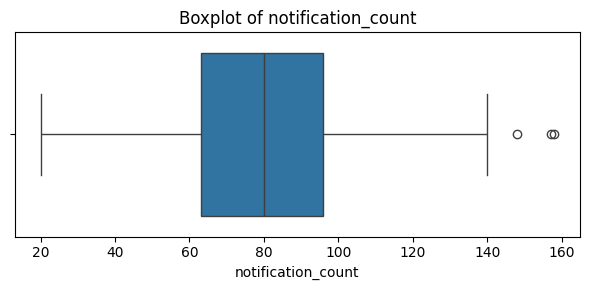

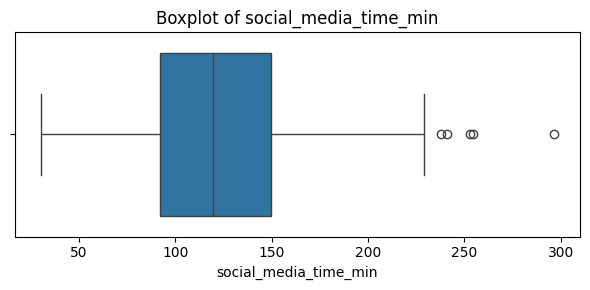

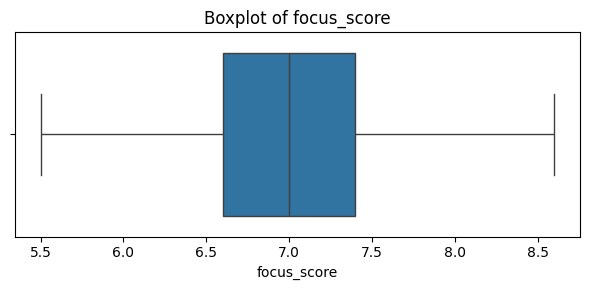

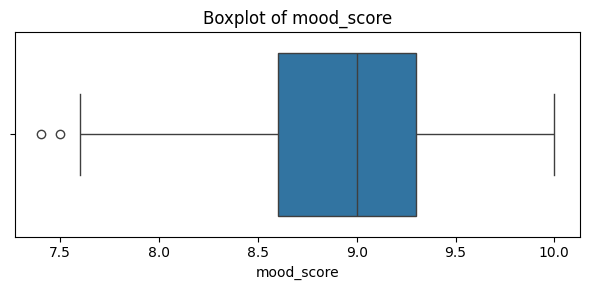

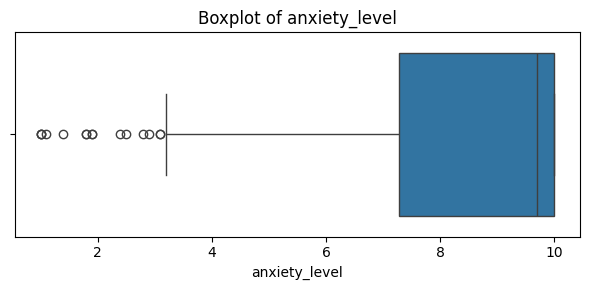

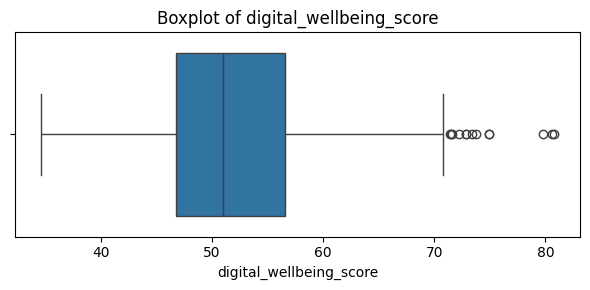

In [9]:
# Loop setiap kolom numerik dan tampilkan boxplot-nya
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

Semua fitur, kecuali focus_score (label) memiliki outlier.

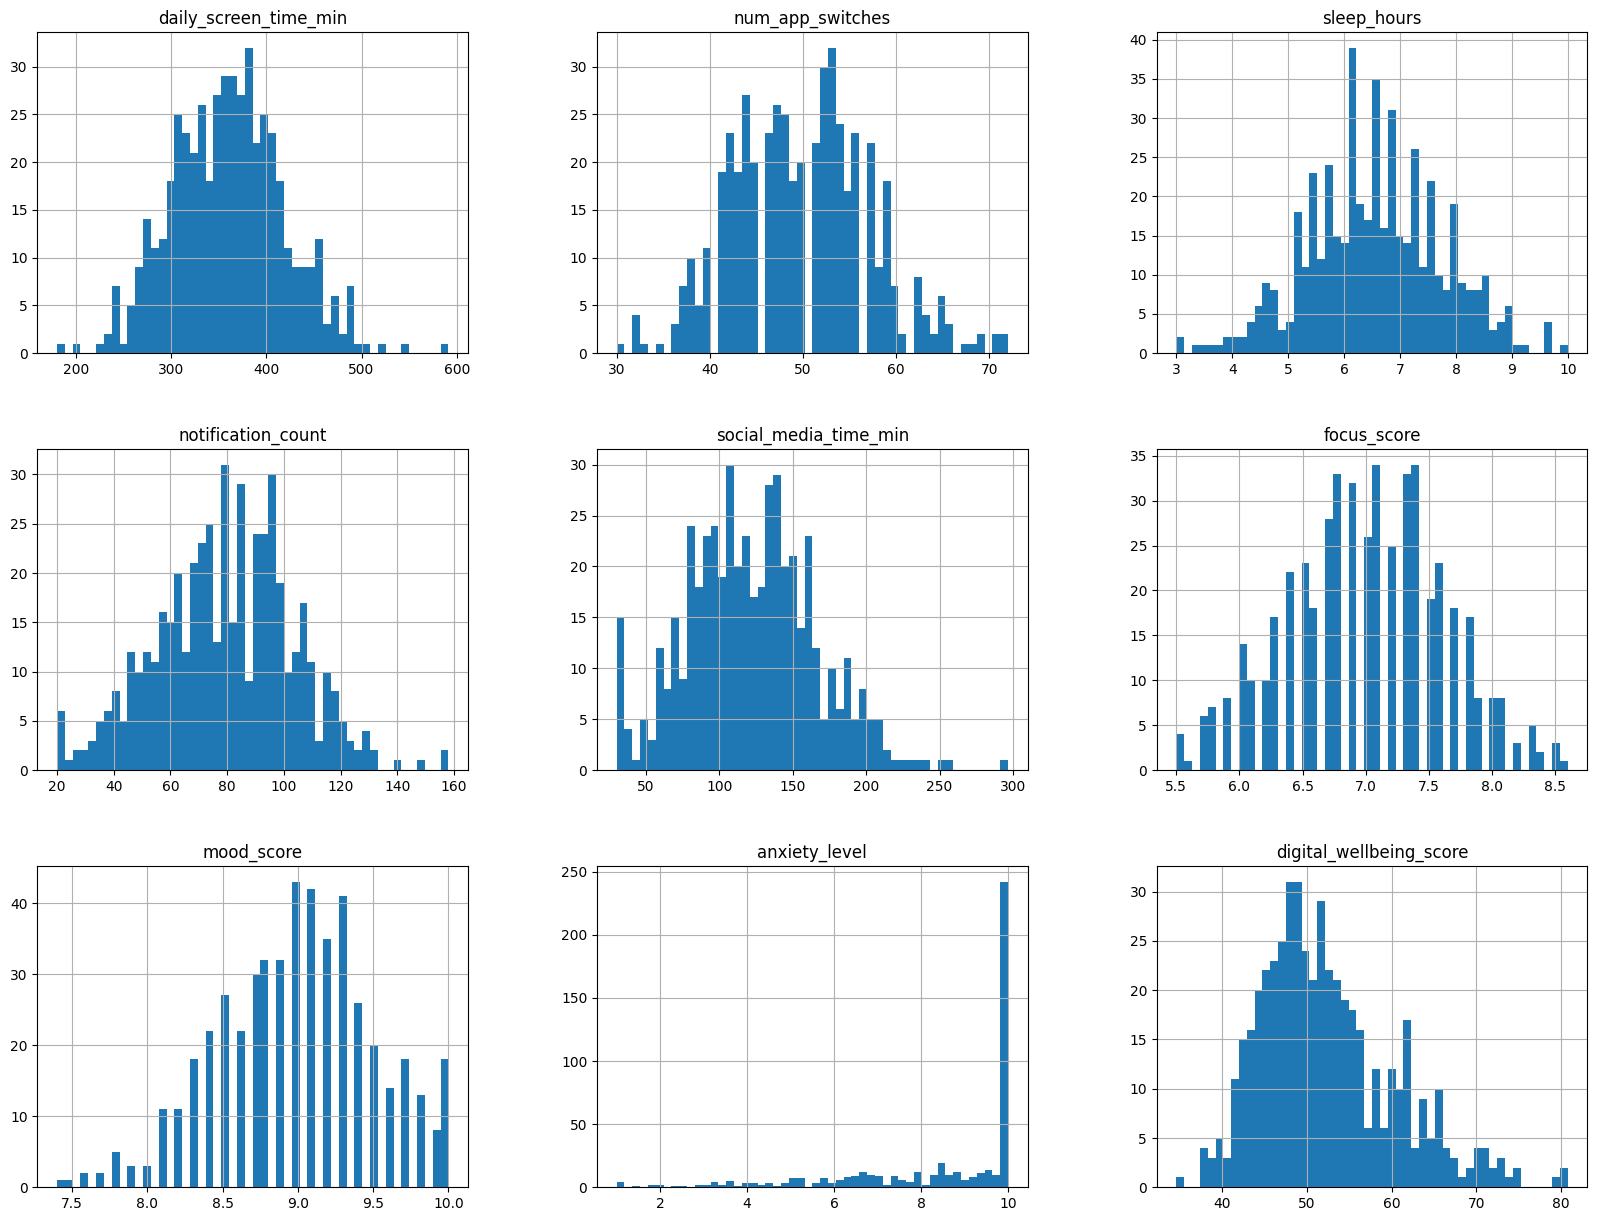

In [10]:
# Menampilkan histogram untuk melihat distribusi data
df.hist(bins=50, figsize=(20,15))
plt.show()

Hampir semua fitur memiliki data dengan distribusi normal, mayoritas datanya berada di sekitar rata-rata, kecuali pada fitur anxiety_level yang datanya menjorok ke kiri, menunjukkan bahwa mayoritas orang memiliki anxiety level yang tinggi.

Text(0.5, 1.0, 'Correlation Matrix ')

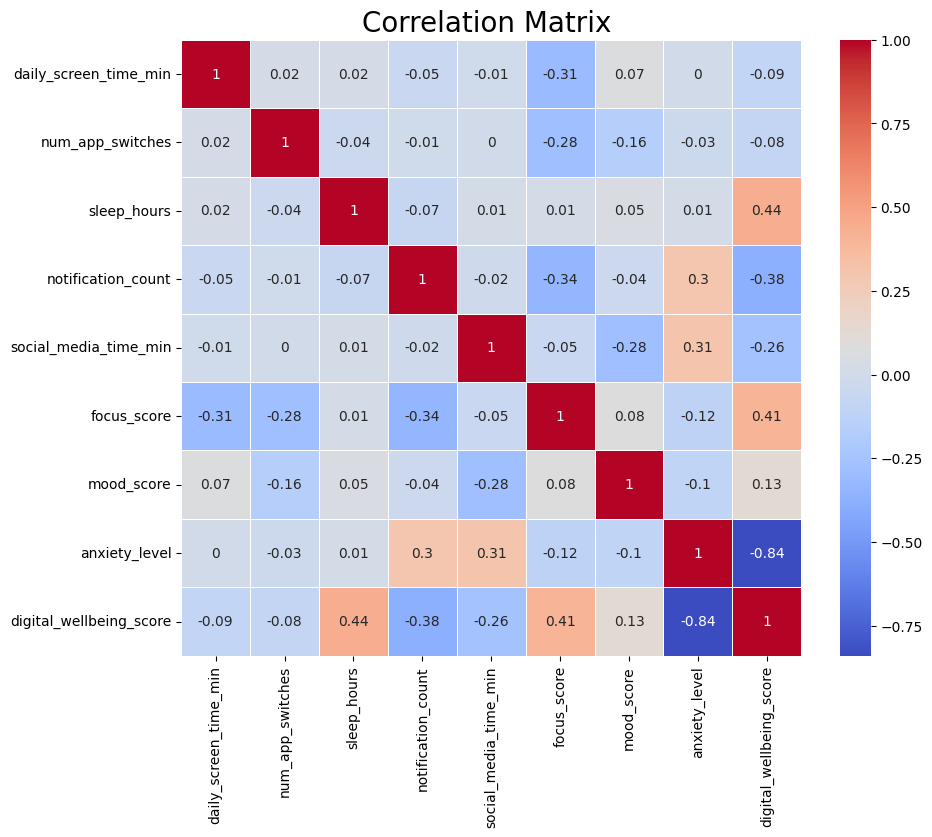

In [11]:
plt.figure(figsize=(10, 8))
cols = df.select_dtypes(include='number').columns
correlation_matrix = df[cols].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix ", size=20)

Beberapa fitur yang memiliki korelasi negatif dengan focus_score diantaranya notification_count (-0.34), daily_screen_time_min (-0.31), dan num_app_switches (-0.28), menunjukkan bahwa ketika ketiga fitur ini meningkat, maka focus_score akan cenderung menurun. Sedangkan digital_wellbeing_score menunjukkan nilai 0.41 terhadap focus_Score menunjukkan fitur ini memiliki korelasi positif. Sedangkan fitur lain nilainya tidak terlalu signifikan.

# Data Preparation

In [12]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
cols = df.select_dtypes(include='number').columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[cols] < (Q1 - 1.5 * IQR)) |
                     (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df.shape

(457, 9)

Menghapus outlier dengan metode IQR, sehingga hanya tersisa 457 entri data

In [13]:
# Train test split
X = df.drop(["focus_score"],axis =1)
y = df["focus_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

Menetapkan fitur focus_score sebagai target. Membagi data menjadi data train dan data test, dengan proporsi 80 data train, 20 data test.

In [14]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 457
Total # of sample in train dataset: 365
Total # of sample in test dataset: 92


Menampilkan jumlah sample pada keseluruhan dataset sebesar 457, pada data train sebanyak 365, dan data test 92

In [15]:
# standardisasi
numerical_features = df.select_dtypes(include='number').columns.drop('focus_score').tolist()
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,mood_score,anxiety_level,digital_wellbeing_score
163,-0.890451,0.957281,-0.320943,0.669815,1.367641,-0.205885,0.710510,-1.364504
423,1.029278,-0.315349,-0.494619,1.325733,1.316280,-1.364979,0.710510,-1.042622
32,-0.026126,-0.173945,-1.015646,-0.860660,-1.508570,-0.785432,-0.053800,-0.184269
236,-2.181580,1.381491,-1.015646,-0.204742,-0.398196,-0.399067,-1.229661,0.244908
65,1.441796,-2.012188,-0.234105,-0.860660,0.565432,0.953210,-1.817591,1.854320


Melakukan normalisasi dengan StandardScaler agar setiap fitur memiliki rata rata 0 dan standar deviasi 1

In [16]:
X_train[numerical_features].describe().round(4)

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,mood_score,anxiety_level,digital_wellbeing_score
count,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000
mean,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000
std,1.0014,1.0014,1.0014,1.0014,1.0014,1.0014,1.0014,1.0014
min,-2.8191,-2.7192,-2.5787,-2.6098,-2.2374,-2.7173,-3.2874,-2.5601
25%,-0.7101,-0.7396,-0.6683,-0.6857,-0.7039,-0.5922,-0.4654,-0.6901
50%,0.0024,-0.0325,-0.0604,-0.0298,-0.0705,-0.0127,0.7105,-0.1230
75%,0.6578,0.6745,0.6343,0.7135,0.7122,0.5668,0.7105,0.6281
max,2.6276,3.0783,2.6315,2.6376,2.6345,1.9191,0.7105,2.7433


melihat statistik deskriptif dari data X_train dengan pembulatan 4 angka di belakang koma

# Modeling

In [17]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['RandomForest', 'LinearRegression'])

Membuat dataframe untuk analisis model

In [18]:
# random forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Membangun model random forest

In [19]:
# linear regression
LR = LinearRegression()
LR.fit(X_train, y_train)

models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=LR.predict(X_train), y_true=y_train)

Membangun model linear regression

In [20]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-20-0615151fc0c1>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.88096175 -0.88096175  0.81587751  0.39166769  0.25026442 -0.17394539
  0.10886115  1.38149059  1.09868405 -0.45675194  3.07832985  1.8057004
 -1.02236502  0.10886115  2.65412003  0.53307096 -0.88096175 -0.73955848
  1.09868405 -0.31534867 -0.17394539  2.08850695 -1.02236502 -0.17394539
  2.22991022  1.09868405 -0.59815521 -1.16376829 -1.30517156  1.38149059
 -0.31534867 -0.59815521 -0.03254212  0.25026442  0.95728078 -1.72938138
  1.66429713  0.53307096  0.95728078 -0.73955848  0.53307096  1.94710368
  1.38149059 -1.30517156  0.10886115  0.53307096 -0.45675194 -1.16376829
  0.67447423 -0.73955848  0.67447423  1.38149059 -1.58797811 -0.73955848
  1.09868405 -0.03254212  1.52289386  1.09868405  0.39166769  0.10886115
  0.53307096  0.10886115  0.95728078  0.81587751  1.8057004   1.24008732
  0.67447423 -0.03254212  0.10886115  0.39166

melakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1

# Evaluasi

In [21]:
# Membuat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['RF','LR'])

# Membuat dictionary untuk setiap algoritma yang digunakan
model_dict = {'RF': RF, 'LR': LR}

# Menghitung nilai MSE pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Memanggil mse
mse

,train,test
RF,0.000028,0.000178
LR,0.000002,0.000002


Berdasarkan hasil evaluasi menggunakan metrik Mean Squared Error (MSE), model Linear Regression (LR) menunjukkan performa yang lebih baik dibandingkan Random Forest (RF). Pada data training, MSE LR sebesar 0.000002, jauh lebih rendah dibandingkan MSE RF yang sebesar 0.000028. Hal yang sama juga terlihat pada data testing, dimana LR memiliki MSE 0.000002 sedangkan RF sebesar 0.000178. Nilai MSE yang lebih rendah pada model Linear Regression mengindikasikan bahwa model ini mampu memberikan prediksi yang lebih akurat dan konsisten terhadap skor fokus dibandingkan dengan Random Forest.

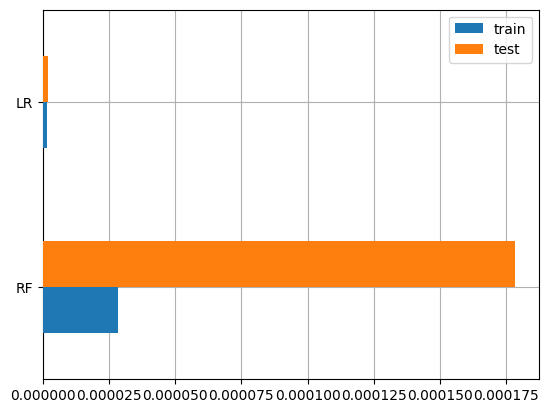

In [22]:
# menampilkan horizontal bar chart dari MSE untuk membandingkan kedua performa model
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Visualisasi dari hasil evaluasi MSE (telah dijelaskan di atas)

In [23]:
# Membandingkan hasil prediksi dari dua model terhadap satu data uji
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_LR
53,7.1,7.0,7.1


Pada contoh prediksi untuk satu data uji dengan nilai sebenarnya (y_true) sebesar 7.1, model Random Forest (prediksi_RF) memprediksi skor fokus sebesar 7.0, sedangkan model Linear Regression (prediksi_LR) memprediksi sebesar 7.1. Hasil ini menunjukkan bahwa prediksi Linear Regression lebih mendekati nilai aktual dibandingkan dengan Random Forest.